In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Train a LinearSVC on a lineraly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to product roughly the same model.

I make use of the iris dataset

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris(as_frame=True)
iris_df = iris.frame
x = iris_df[['petal length (cm)','petal width (cm)']].values
y = iris_df['target']

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
seto_vers = (y == 0) | (y == 1) # where y = 0 & y = 1 

In [6]:
x = x[seto_vers]
y = y[seto_vers]

In [7]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lin_clf = LinearSVC().fit(x_scaled,y)
svm_clf = SVC(kernel='linear').fit(x_scaled,y)
sdg_clf = SGDClassifier().fit(x_scaled,y)

In [9]:
def compute_decision_boundary(model):
    w = -model.coef_[0,0]/model.coef_[0,1]
    b = -model.intercept_[0]/model.intercept_[0]
    return scaler.inverse_transform([[-10,-10 * w +b], [10,10*w + b]])

In [10]:
lin_line = compute_decision_boundary(lin_clf)
svm_line = compute_decision_boundary(svm_clf)
sdg_line = compute_decision_boundary(sdg_clf)

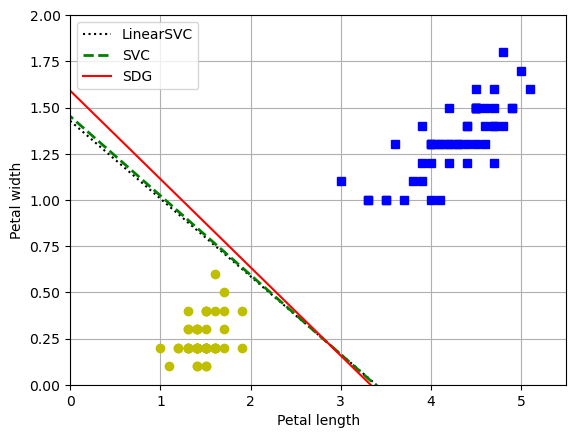

In [11]:
plt.plot(lin_line[:,0],lin_line[:,1],'k:',label='LinearSVC')
plt.plot(svm_line[:,0],svm_line[:,1],'g--',linewidth=2,label='SVC')
plt.plot(sdg_line[:,0],sdg_line[:,1],'r-',label='SDG')
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
plt.plot(x[:,0][y==0],x[:,1][y==0],'yo')
plt.xlabel("Petal length")
plt.ylabel('Petal width')
plt.axis([0,5.5,0,2])
plt.legend()
plt.grid();

**Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

In [12]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1, cache=True, as_frame=False)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [13]:
x = mnist.data
y = mnist.target

In [14]:
x_train = x[:60000]
x_test = x[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [15]:
from sklearn.svm import SVC

svc_clf = SVC(random_state = 42)

In [16]:
svc_clf.fit(x_train,y_train)

SVC(random_state=42)

In [17]:
y_train_preds = svc_clf.predict(x_train)
y_test_preds = svc_clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_preds)
accuracy_score(y_test,y_test_preds)

0.9792